## Importing packages and reading data

In [2]:
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.AllChem import GenerateDepictionMatching3DStructure as Struct_3D
from rdkit.ForceField.rdForceField import MMFFMolProperties as properties
import rdkit.Chem.Draw as draw

from itertools import zip_longest
#from mpl_toolkits.mplot3d import Axes3D


In [3]:
df = pd.read_csv('temp_cleaned_data.tsv',sep='\t')
df = df.set_index('#')
df.head(3)

,Name,name_smiles,Wavelength,Epsilon,Quantum Yield
#,,,,,
1,Benzene,C1=CC=CC=C1,254.75,210,0.053
2,Toluene,CC1=CC=CC=C1,261.75,"2,860",0.170
3,o-Xylene,CC1=CC=CC=C1C,263.00,254,0.170


## Generating a Coulomb matrix for benzene

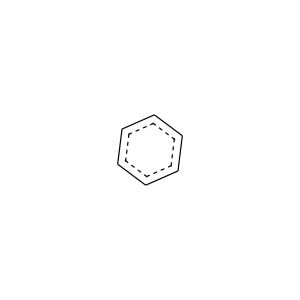

In [4]:
# Defining the SMILES string from df
benz_smiles = df.name_smiles[1]
# Building the benzene molecule
benz = Chem.MolFromSmiles(benz_smiles)
# 'Embedding' the molecule to assign coordinates to nuclei
AllChem.EmbedMolecule(benz)
# Optimising the molecule
AllChem.MMFFOptimizeMolecule(benz)
# Generating universal force field model
ff1 = AllChem.UFFGetMoleculeForceField(benz)
# Getting the positions of nuclei; returned as a tuple of the form (x1, y1, z1, x2, y2, z2, x3, ...)
pos1 = ff1.Positions()
# Drawing the molecule
draw.MolToImage(benz, kekulize=False) # can also use .MolToFile to save to a file

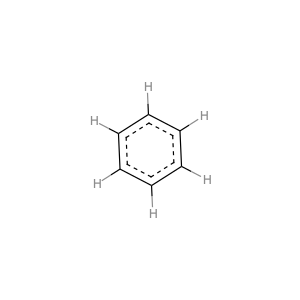

In [5]:
# Adding Hydrogens to the structure and repeating the process
benz_H = Chem.AddHs(benz)
AllChem.EmbedMolecule(benz_H)
AllChem.MMFFOptimizeMolecule(benz_H)
ff2 = AllChem.UFFGetMoleculeForceField(benz_H)
pos2 = ff2.Positions()
draw.MolToImage(benz_H, kekulize=False)

In [10]:
benz_type = benz_H.GetAtoms()

In [12]:
for atom in benz_type:
    print(atom.GetAtomicNum())

6
6
6
6
6
6
1
1
1
1
1
1


In [13]:
# Showing the lengths of the tuples containing the coordinates of nuclei for both versions of benzene:
# (pos1 is benzene without Hydrogens)
# (pos2 is benzene with Hydrogens)

print('Number of nuclei in benzene without Hydrogens: ' + str(len(pos1)/3))
print('Number of nuclei in benzene with Hydrogens: ' + str(len(pos2)/3))

Number of nuclei in benzene without Hydrogens: 6.0
Number of nuclei in benzene with Hydrogens: 12.0


### STATING THE OBVIOUS: We must remember to **add Hydrogens** to the structure because SMILES omits them!

In [14]:
def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(fillvalue=fillvalue, *args)

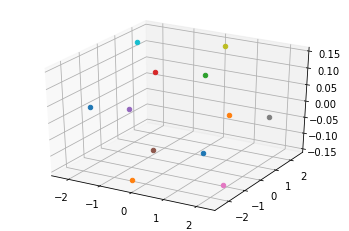

In [19]:
import matplotlib.pyplot as plt
x = []
y = []
z = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for item1, item2, item3 in grouper(3, pos2):
    x.append(item1)
    y.append(item2)
    z.append(item3)
    ax.scatter(item1, item2, item3)
    # Do something with item1 and item2

In [63]:
x

[1.3574437725928412,
 0.5985624740739321,
 -0.7786480373240973,
 -1.3614946709872575,
 -0.5939829778124129,
 0.7842721213565208,
 2.4361127756780268,
 1.0661549994221433,
 -1.355351630321559,
 -2.450070004547133,
 -1.0544004470696324,
 1.3514016249386622]